# Libraries Installation

In [ ]:
# Asteroid Library

# For audio processing and modeling
# !pip install git+https://github.com/asteroid-team/asteroid --quiet

!pip install gradio --quiet
!pip install asteroid --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Importing Libraries

In [ ]:
import os
import shutil
import torch
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# For loading and visualizing audio files
from IPython.display import display, Audio

In [ ]:
from torch import optim                                          # Optimizers
from pytorch_lightning import Trainer

from asteroid.models import ConvTasNet, DPRNNTasNet
from asteroid.data import LibriMix

from asteroid.losses import PITLossWrapper, pairwise_neg_sisdr   # Loss function
from asteroid.engine import System                               # System

In [ ]:
# Generating requirement.txt
!pip freeze > requirements.txt
!pip list --format=freeze > requirements.txt

# Dataset

In [ ]:
# Downloading 

'''
*
*    ## Download Dataset [Fresh Copy]
*
*        ## 1. Using wget and link of dataset
*        !wget https://zenodo.org/record/3871592/files/MiniLibriMix.zip?download=1
*
*    ## 2.  Using internal function
*
*        ## from asteroid.data import LibriMix
*        ## LibriMix.mini_download()
*
*    ## 3. Use own custom dataset
*        ## Upload generated dataset
*
*       
'''


'\n*\n*    ## Download Dataset [Fresh Copy]\n*\n*        ## 1. Using wget and link of dataset\n*        !wget https://zenodo.org/record/3871592/files/MiniLibriMix.zip?download=1\n*\n*    ## 2.  Using internal function\n*\n*        ## from asteroid.data import LibriMix\n*        ## LibriMix.mini_download()\n*\n*    ## 3. Use own custom dataset\n*        ## Upload generated dataset\n*\n*       \n'

In [ ]:
# Using dataset stored in Google Drive
!cp -av '/content/drive/MyDrive/Speech Dataset/MiniLibriMix' '/content' 

Streaming output truncated to the last 5000 lines.
'/content/drive/MyDrive/Speech Dataset/MiniLibriMix/val/noise/6295-244435-0005_3576-138058-0013.wav' -> '/content/MiniLibriMix/val/noise/6295-244435-0005_3576-138058-0013.wav'
'/content/drive/MyDrive/Speech Dataset/MiniLibriMix/val/noise/6345-64257-0004_777-126732-0002.wav' -> '/content/MiniLibriMix/val/noise/6345-64257-0004_777-126732-0002.wav'
'/content/drive/MyDrive/Speech Dataset/MiniLibriMix/val/noise/652-129742-0008_6241-61946-0004.wav' -> '/content/MiniLibriMix/val/noise/652-129742-0008_6241-61946-0004.wav'
'/content/drive/MyDrive/Speech Dataset/MiniLibriMix/val/noise/7976-105575-0027_2803-154320-0005.wav' -> '/content/MiniLibriMix/val/noise/7976-105575-0027_2803-154320-0005.wav'
'/content/drive/MyDrive/Speech Dataset/MiniLibriMix/val/noise/5694-64029-0010_1919-142785-0019.wav' -> '/content/MiniLibriMix/val/noise/5694-64029-0010_1919-142785-0019.wav'
'/content/drive/MyDrive/Speech Dataset/MiniLibriMix/val/noise/1919-142785-0032_

# Dataloders

In [ ]:
'''
# Building dataloader for own dataset

train_set = LibriMix(
    csv_dir='/content/MiniLibriMix/metadata/train',
    task='sep_clean',
    sample_rate=8000,
    n_src=2,
    segment=3,
)

val_set = LibriMix(
    csv_dir='/content/MiniLibriMix/metadata/val',
    task='sep_clean',
    sample_rate=8000,
    n_src=2,
    segment=3,
)

train_loader = DataLoader(
    train_set,
    shuffle=True,
    batch_size=4,
    num_workers=2,
    drop_last=True,
)

val_loader = DataLoader(
    val_set,
    shuffle=False,
    batch_size=4,
    num_workers=2,
    drop_last=True,
)

*
'''

"\n# Building dataloader for own dataset\n\ntrain_set = LibriMix(\n    csv_dir='/content/MiniLibriMix/metadata/train',\n    task='sep_clean',\n    sample_rate=8000,\n    n_src=2,\n    segment=3,\n)\n\nval_set = LibriMix(\n    csv_dir='/content/MiniLibriMix/metadata/val',\n    task='sep_clean',\n    sample_rate=8000,\n    n_src=2,\n    segment=3,\n)\n\ntrain_loader = DataLoader(\n    train_set,\n    shuffle=True,\n    batch_size=4,\n    num_workers=2,\n    drop_last=True,\n)\n\nval_loader = DataLoader(\n    val_set,\n    shuffle=False,\n    batch_size=4,\n    num_workers=2,\n    drop_last=True,\n)\n\n*\n"

In [ ]:
# Creating data loaders
train_loader, val_loader = LibriMix.loaders_from_mini(task = "sep_clean",
                                             batch_size = 8
)

# Type of Loader
print('Type of loaders: ', type(train_loader))

Drop 0 utterances from 800 (shorter than 3 seconds)
Drop 0 utterances from 200 (shorter than 3 seconds)
Type of loaders:  <class 'torch.utils.data.dataloader.DataLoader'>


# Classes

In [ ]:
class deep_models():
    def __init__(self, **kwargs):
        self.load_model = kwargs['load_model']
        self.model_type = kwargs['model_type']
        self.path = kwargs['path']
        # self.model = None
        # Pretrained models
        
        print(f">>> Load Model : {self.model_type}")
        if self.load_model == True:
            self.path = kwargs['path']
            self.model_type = kwargs['model_type']
            print(f">>> Model Type: {self.model_type}")
            self.model = self.load_my_model()
        
        else:
            # Model Parameters
            self.n_src = kwargs['n_src']
            self.kernal_size = kwargs['kernal_size']
            self.n_filter = kwargs['n_filter']
            self.stride = kwargs['stride']
            self.sample_rate = kwargs['sample_rate']
            
            
            print(f">>> Model Scratch: {self.model_type}")
            # Scratch Conv Model
            if self.model_type == 1:
                self.model = self.create_conv_model()

            # Scratch DPRNN Model
            else:
                self.model = self.create_dprnn_model()
    
    def get_model(self):
        return self.model

    def create_conv_model(self):
        # Creating ConvTasNet model from scratch
        model = ConvTasNet(n_src = self.n_src,
                            kernal_size = self.kernal_size,
                            n_filter = self.n_filter,
                            stride = self.stride, 
                            sample_rate = self.sample_rate      
        )

        return model

    def create_dprnn_model(self):
        # Creating DPRNNTasNet model from scratch
        model = DPRNNTasNet(n_src = self.n_src,
                            kernal_size = self.kernal_size,
                            n_filter = self.n_filter,
                            stride = self.stride, 
                            sample_rate = self.sample_rate      
        )

        return model
    
    def load_my_model(self):
        # Returning pretrained ConvTasNet Model
        model = None
        if self.model_type == 1:
            model = ConvTasNet.from_pretrained(self.path)
            print(">> Conv Model")

        # Returning pretrained DPRNNTasNet Model
        else:
            model = DPRNNTasNet.from_pretrained(self.path)
            print(">> DPRNNTasNet Model")

        return model

In [ ]:
class training():
    def __init__(self, **kwargs):
        # Parameters
        self.model = kwargs['model']
        self.epoch_max = kwargs['epoch_max']
        self.train_loader = kwargs['train_loader']
        self.val_loader = kwargs['val_loader']
        self.optimizer = kwargs['optimizer']
        
        # Updating optimizer if other is selected
        self.opti = self.get_optimizer()

        # Setting up default loss
        self.loss = PITLossWrapper(pairwise_neg_sisdr,
                      pit_from = "pw_mtx"
        )

        # System
        self.system = self.setup_system()

        # Train
        trainer = Trainer(max_epochs=self.epoch_max)
        trainer.fit(self.system)
    
    def get_optimizer(self):
        if self.optimizer == 1:
            return  optim.Adam(self.model.parameters(),
                    lr = 0.001,
            )
            
        return  optim.SGD(self.model.parameters(),
                    lr = 0.001,
                    momentum = 0.91
        )

    def setup_system(self):
        # System
        system = System(self.model, 
                        self.opti,
                        self.loss,
                        self.train_loader,
                        self.val_loader
        )    
        return system

    # Clear cache and free up some moemory
    def clear_cache():
        torch.cuda.empty_cache()
        print(' > Cuda: Cache Cleared ')

    # To fetch cuda memory summary
    def get_gpu_memory_summary():
        summary = torch.cuda.memory_summary()
        print(f'{summary}')


In [ ]:
class tester():
    def __init__(self, model):
        # Modeling
        self.model = model

        # Test Directory will also contain output after files
        self.test_dir = '/content/MiniLibriMix/test_subject/'
    
    def prepare_test(self):
        # Removing older test and their results
        if os.path.exists(self.test_dir):
            shutil.rmtree(self.test_dir)
        
        if not os.path.exists(self.test_dir):    
            os.mkdir(self.test_dir)

    def test(self, path):
        self.prepare_test()

        test_subject = self.test_dir + 'test.wav'
        shutil.copyfile(path, test_subject)

        self.model.separate(test_subject,force_overwrite=True, resample=True)

    def view_results(self):
        total_files = len(os.listdir(self.test_dir))
        if total_files == 0:
            print("> Not test Present")
            return

        print('Original Audio')
        display(Audio(os.path.join(self.test_dir,'test.wav')))

        print('Separated Audio')
        for i in range(1, total_files):
            speaker = 'test_est' + str(i) + '.wav'
            print(">> Speaker: ", speaker)
            display(Audio(os.path.join(self.test_dir, speaker)))


#Modeling

## New Model

**Paramertes Sample**


```
params = {'load_model': False,
         'model_type': 1,
         'path': '',
         'n_src': 2,
         'kernal_size': 16,
         'n_filter': 256,
         'stride': 8,
         'sample_rate': 8000
}
```




In [ ]:
# Deep Models Object
model = deep_models(load_model= False,
                     model_type= 1,
                     path= '',
                     n_src=2,
                     kernal_size= 16,
                     n_filter= 512,
                     stride= 8,
                     sample_rate= 8000
)
model1 = model.get_model()
print(type(model1))

>>> Load Model : 1
>>> Model Scratch: 1
<class 'asteroid.models.conv_tasnet.ConvTasNet'>


In [ ]:
# Training
Train = training(model = model1,
                train_loader = train_loader,
                val_loader = val_loader,
                optimizer = 1,
                epoch_max = 1
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type           | Params
---------------------------------------------
0 | model     | ConvTasNet     | 5.1 M 
1 | loss_func | PITLossWrapper | 0     
---------------------------------------------
5.1 M     Trainable params
0         Non-trainable params
5.1 M     Total params
20.202    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
training.get_gpu_memory_summary()

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |  12237 MiB |   7115 GiB |   7115 GiB |
|       from large pool |      0 B   |  12179 MiB |   7107 GiB |   7107 GiB |
|       from small pool |      0 B   |    115 MiB |      7 GiB |      7 GiB |
|---------------------------------------------------------------------------|
| Active memory         |      0 B   |  12237 MiB |   7115 GiB |   7115 GiB |
|       from large pool |      0 B   |  12179 MiB |   7107 GiB |

In [ ]:
# Tester
Test = tester(model1)
Test.prepare_test()

Test.test('/content/MiniLibriMix/test/mix_clean/Audio0.wav')

In [ ]:
# Display test Results
Test.view_results()

Original Audio


Separated Audio
>> Speaker:  test_est1.wav
>> Speaker:  test_est2.wav


## Loading Saved Model

In [ ]:
# Deep Models Object
model2 = deep_models(load_model=True,
                     model_type=1,
                     path= '/content/MiniLibriMix/saved_models/2speakers/model_2spk4.ckpt',
                     n_src=2,
                     kernal_size= 16,
                     n_filter= 256,
                     stride= 8,
                     sample_rate=8000
)
model2 = model2.get_model()

>>> Load Model : 1
>>> Model Type: 1
>> Conv Model


In [ ]:
test_audio2 = 'Audio0.wav'

In [ ]:
# Tester
Test = tester(model2)
Test.prepare_test()
Test.test('/content/MiniLibriMix/test/mix_clean/' + test_audio2)

In [ ]:
# Display test Results
Test.view_results()

Original Audio


Separated Audio
>> Speaker:  test_est1.wav


>> Speaker:  test_est2.wav


In [ ]:
# Original Speakers
print(">> Speaker Original 1")
display(Audio('/content/MiniLibriMix/test/s1/' + test_audio2))

print(">> Speaker Original 2")
display(Audio('/content/MiniLibriMix/test/s2/' + test_audio2))

>> Speaker Original 1


>> Speaker Original 2


# Test Result Visualization 

## 2-Speakers Result Visualization

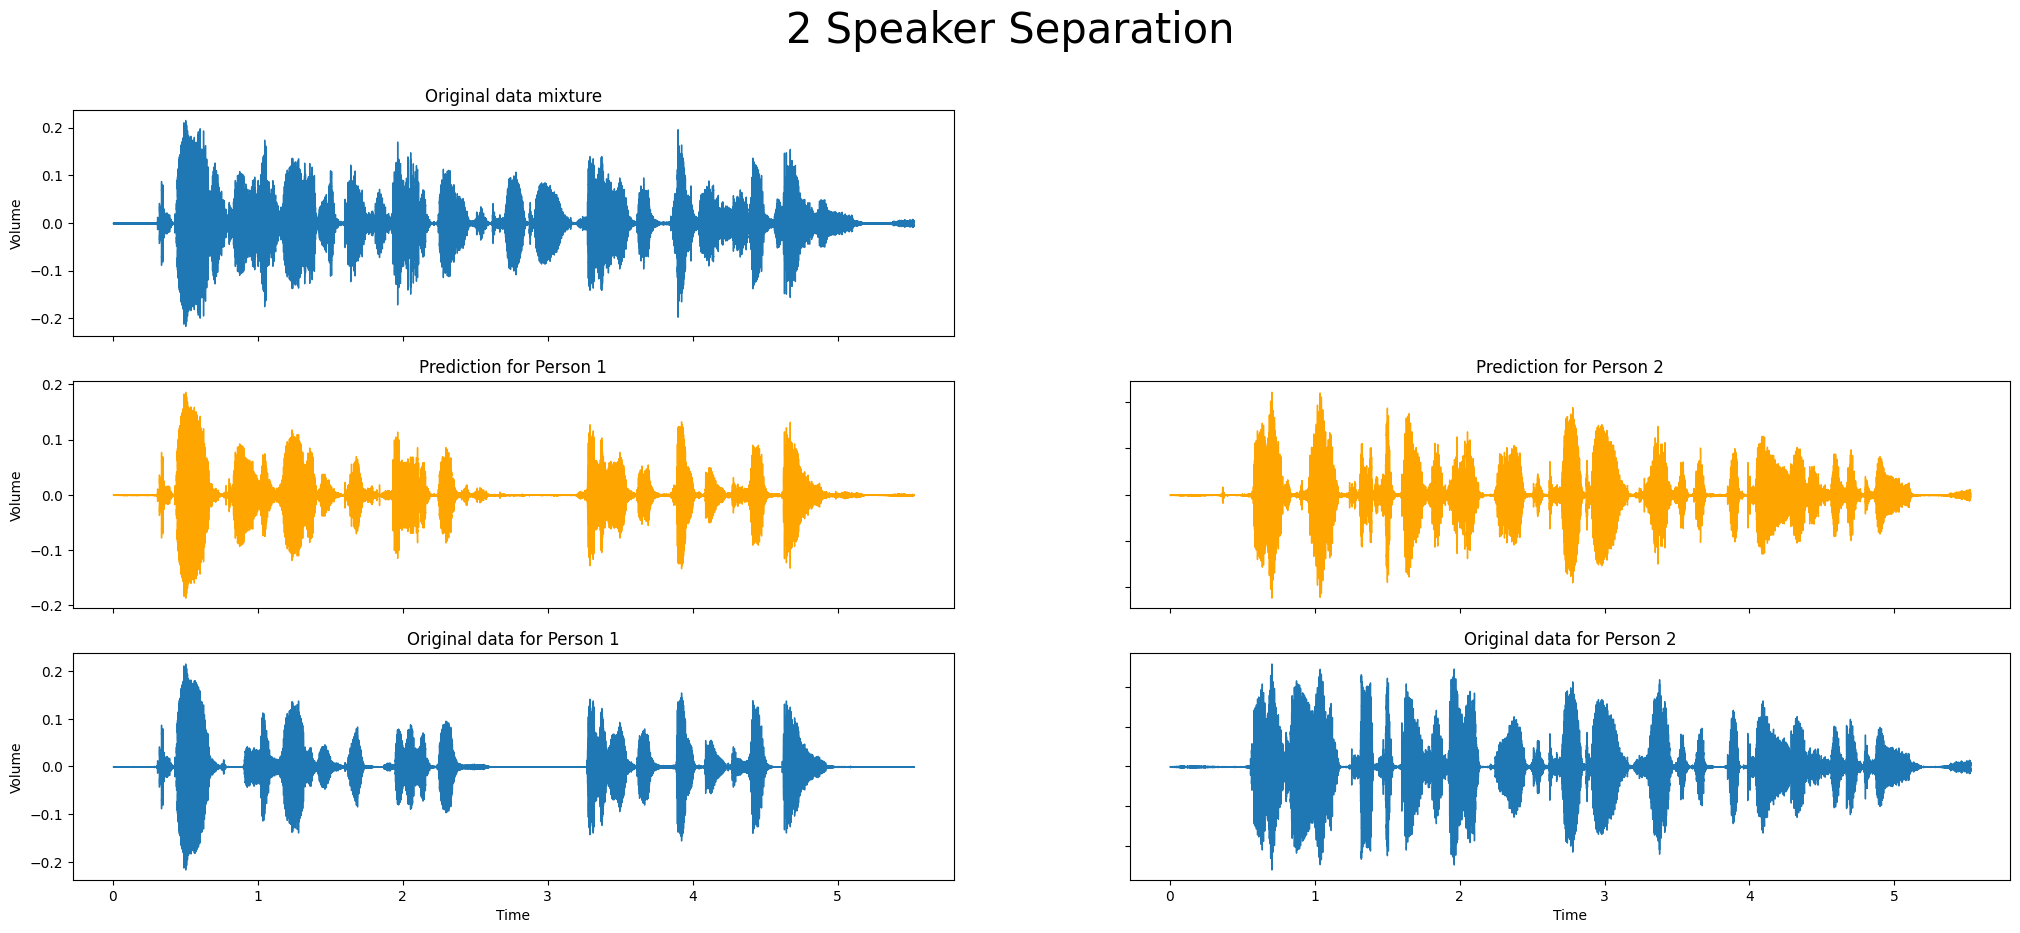

In [ ]:
def two_speakers_waveplot():
    # Wave Plot
    subplots  = [(2,1,1),(2,2,)]
    fig, ax = plt.subplots(3, 2,figsize=(25, 10))
    fig.suptitle('2 Speaker Separation', fontsize=30)

    # Original
    data, rate = librosa.load('/content/MiniLibriMix/test_subject/test.wav')

    librosa.display.waveshow(data, sr=rate, ax=ax[0,0])
    librosa.display.waveshow(data, sr=rate, ax=ax[0,1])
    ax[0,0].set_title("Original data mixture")

    ax[0,1].set_visible(False)

    # Predicted
    pdata1, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est1.wav')
    pdata2, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est2.wav')
    ax[1,0].set_title("Prediction for Person 1")
    ax[1,1].set_title("Prediction for Person 2")

    librosa.display.waveshow(pdata1, sr=rate, ax=ax[1,0], color='Orange')
    librosa.display.waveshow(pdata2, sr=rate, ax=ax[1,1], color='Orange')

    # Original Separated
    odata1, rate = librosa.load('/content/MiniLibriMix/test/s2/' + test_audio2)
    odata2, rate = librosa.load('/content/MiniLibriMix/test/s1/' + test_audio2)
    ax[2,0].set_title("Original data for Person 1")
    ax[2,1].set_title("Original data for Person 2")

    librosa.display.waveshow(odata1, sr=rate, ax=ax[2,0])
    librosa.display.waveshow(odata2, sr=rate, ax=ax[2,1])

    for a in ax.flat:
        a.set(xlabel='Time', ylabel='Volume')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()

two_speakers_waveplot()

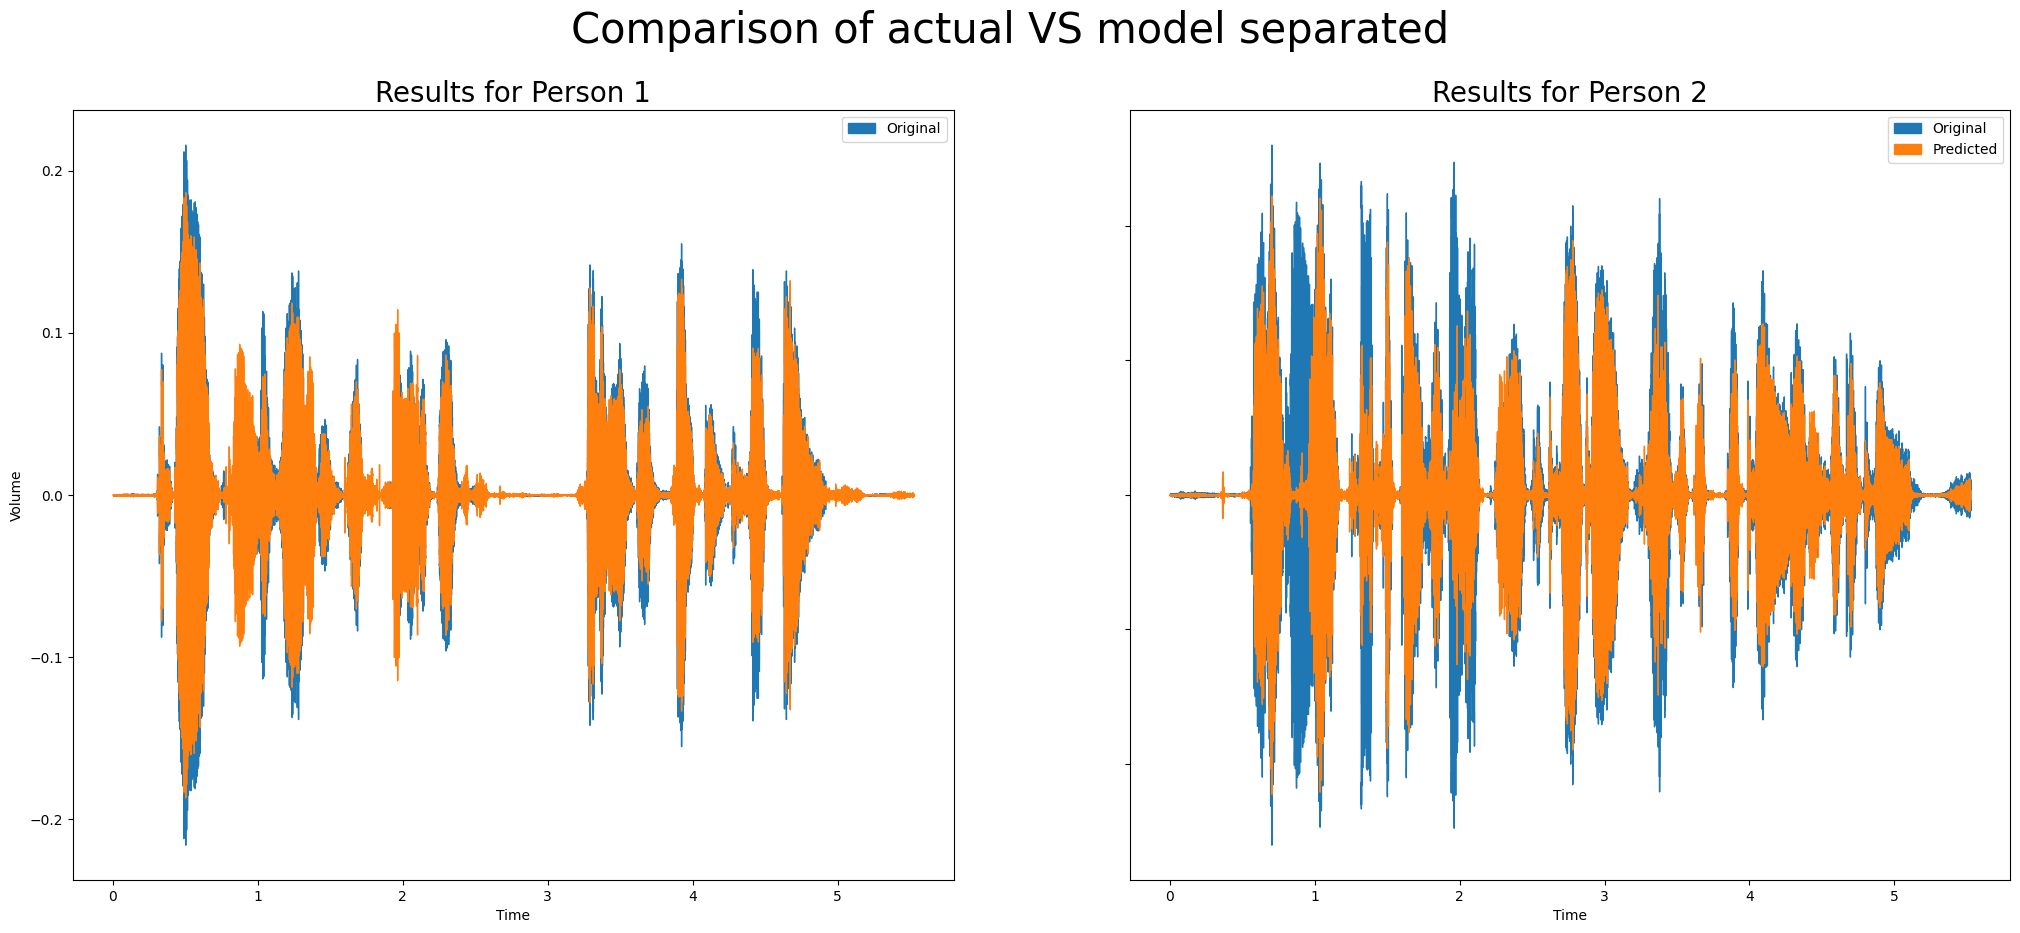

In [ ]:
def two_speakers_comparision():
    # Wave Plot
    fig, ax = plt.subplots(1, 2,figsize=(25, 10))
    fig.suptitle('Comparison of actual VS model separated', fontsize=30)

    odata1, rate = librosa.load('/content/MiniLibriMix/test/s2/' + test_audio2)
    odata2, rate = librosa.load('/content/MiniLibriMix/test/s1/' + test_audio2)

    librosa.display.waveshow(odata1, sr=rate, ax=ax[0], label='Original')
    librosa.display.waveshow(odata2, sr=rate, ax=ax[1], label='Original')
    ax[0].set_title("Results for Person 1", fontsize = 20)
    ax[0].legend()

    # blue = actual
    # orange = predicted
    # 1 = person 1
    # 2 = person 2

    # Overlapped
    pdata1, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est1.wav')
    pdata2, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est2.wav')
    librosa.display.waveshow(pdata1, sr=rate, ax=ax[0], label='Predicted')
    librosa.display.waveshow(pdata2, sr=rate, ax=ax[1], label='Predicted')
    ax[1].set_title("Results for Person 2", fontsize = 20)
    ax[1].legend()

    for a in ax.flat:
        a.set(xlabel='Time', ylabel='Volume')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()

two_speakers_comparision()

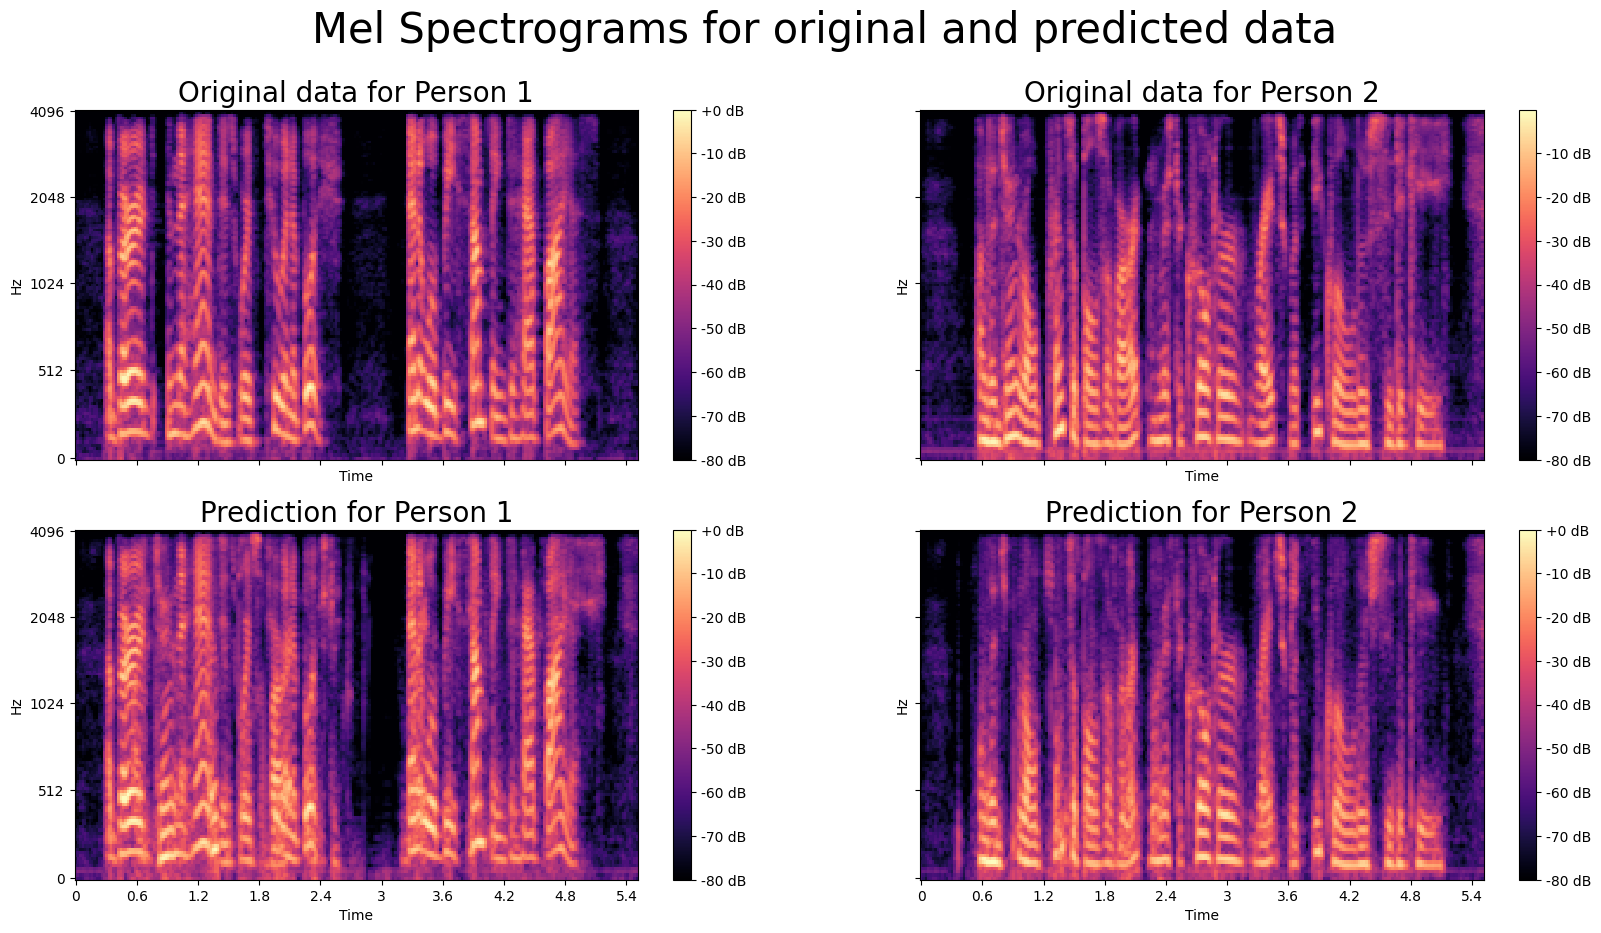

In [ ]:
def two_speakers_spectrogram():
    fig, ax = plt.subplots(2, 2,figsize=(20, 10))
    fig.suptitle('Mel Spectrograms for original and predicted data', fontsize=30)

    odata1, rate = librosa.load('/content/MiniLibriMix/test/s2/' + test_audio2)
    odata2, rate = librosa.load('/content/MiniLibriMix/test/s1/' + test_audio2)
    
    pdata1, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est1.wav')
    pdata2, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est2.wav')

    for a in ax.flat:
        a.set(xlabel='Time', ylabel='Hz')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()
        
    # Original data
    S = librosa.feature.melspectrogram(y=odata1, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[0,0])
    fig.colorbar(img, ax=ax[0,0], format='%+2.0f dB')
    ax[0,0].set_title("Original data for Person 1", fontsize = 20)

    S = librosa.feature.melspectrogram(y=odata2, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[0,1])
    fig.colorbar(img, ax=ax[0,1], format='%+2.0f dB')
    ax[0,1].set_title("Original data for Person 2", fontsize = 20)

    # Predicted Data
    S = librosa.feature.melspectrogram(y=pdata1, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[1,0])
    fig.colorbar(img, ax=ax[1,0], format='%+2.0f dB')
    ax[1,0].set_title("Prediction for Person 1", fontsize = 20)

    S = librosa.feature.melspectrogram(y=pdata2, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[1,1])
    fig.colorbar(img, ax=ax[1,1], format='%+2.0f dB')
    ax[1,1].set_title("Prediction for Person 2", fontsize = 20)

two_speakers_spectrogram()

In [ ]:
import gradio as gr

In [ ]:
demo = gr.Blocks(theme=gr.themes.Soft())
with demo:
    
    gr.Markdown('''
    <center>
        <h1>Speech Separation</h1>
        <div style="display:flex;align-items:center;justify-content:center;">
            <iframe src="https://streamable.com/e/79z5ub?autoplay=1&nocontrols=1" frameborder="0" allow="autoplay">
            </iframe>
        </div>
        <p>
            It is a shareable demonstration window which can be used to view result on any device by setting 'share' a launch parameter 'True'.
            It displays original audio for mixture of speaker, seperated audio by our model and original individual speaker audio.
        </p>
    </center>
    ''')
    
    with gr.Row():
        output_text1 = gr.Text("Original Speech signal ", label='Speaker 1', interactive=False)
        gr.Audio('/content/MiniLibriMix/test_subject/test.wav', label='Mix Audio', interactive=False)

    with gr.Row():
        pass
    with gr.Row():
        pass
    gr.Markdown('''
        <h2> Separated Audio</h2>
    
    ''')
    with gr.Row():
        output_text2 = gr.Text("Separated Speech signal Speaker 1 ", label='Speaker 1', interactive=False)
        gr.Audio('/content/MiniLibriMix/test_subject/test_est1.wav', label='Speaker 1', interactive=False)
    
    with gr.Row():
        output_text2 = gr.Text("Separated Speech signal Speaker 2 ", label='Speaker 1', interactive=False)
        gr.Audio('/content/MiniLibriMix/test_subject/test_est2.wav', label='Speaker 2', interactive=False)


    with gr.Row():
        pass    
    with gr.Row():
        pass
    gr.Markdown('''         
        <h2> Original Source Audio</h2>
    
    ''')
    with gr.Row():
        output_text2 = gr.Text("Separated Speech signal Speaker 1 ", label='Speaker 1', interactive=False)
        gr.Audio('/content/MiniLibriMix/test/s1/' + test_audio2, label='Speaker 1', interactive=False)
    
    with gr.Row():
        output_text2 = gr.Text("Separated Speech signal Speaker 2 ", label='Speaker 1', interactive=False)
        gr.Audio('/content/MiniLibriMix/test/s2/' + test_audio2, label='Speaker 2', interactive=False)
    
    gr.Markdown('''
    <center>
        <div style="display:flex;align-items:center;justify-content:center;">
            <a href="https://www.linkedin.com/in/dhruv73/" target="blank">
                <img src="https://raw.githubusercontent.com/devicons/devicon/1119b9f84c0290e0f0b38982099a2bd027a48bf1/icons/linkedin/linkedin-original.svg" alt="LinkedIN: /dhruv_73" width="100" height="100"/> 
            </a>
            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp
            <a href="https://github.com/DS-73" target="_blank"> 
                <img src="https://raw.githubusercontent.com/devicons/devicon/1119b9f84c0290e0f0b38982099a2bd027a48bf1/icons/github/github-original.svg" alt="Github: /DS-73" width="100" height="100"/> 
            </a>
        </div>
    </center>
    ''')

demo.close()

In [ ]:
# demo.launch(share=True)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
demo.close()

Closing server running on port: 7863


## 3-Speakers Result Visualization

In [ ]:
# Deep Models Object
model3 = deep_models(load_model=True,
                     model_type=1,
                     path= '/content/MiniLibriMix/saved_models/3speakers/model_3spk2.ckpt',
                     n_src=3,
                     kernal_size= 16,
                     n_filter= 256,
                     stride= 8,
                     sample_rate=16000
)
model3 = model3.get_model()

>>> Load Model : 1
>>> Model Type: 1
>> Conv Model


In [ ]:
test_audio3 = '19-198-0001_2289-152257-0020_4680-16042-0014.wav'

In [ ]:
# Tester
Test = tester(model3)
Test.prepare_test()
Test.test('/content/MiniLibriMix/3spk test/mix_clean/' + test_audio3)

In [ ]:
# Display test Results
Test.view_results()

Original Audio


Separated Audio
>> Speaker:  test_est1.wav


>> Speaker:  test_est2.wav


>> Speaker:  test_est3.wav


In [ ]:
# Original Speakers
print(">> Speaker Original 1")
display(Audio('/content/MiniLibriMix/3spk test/s1/' + test_audio3))

print(">> Speaker Original 2")
display(Audio('/content/MiniLibriMix/3spk test/s2/' + test_audio3))

print(">> Speaker Original 3")
display(Audio('/content/MiniLibriMix/3spk test/s3/' + test_audio3))

>> Speaker Original 1


>> Speaker Original 2


>> Speaker Original 3


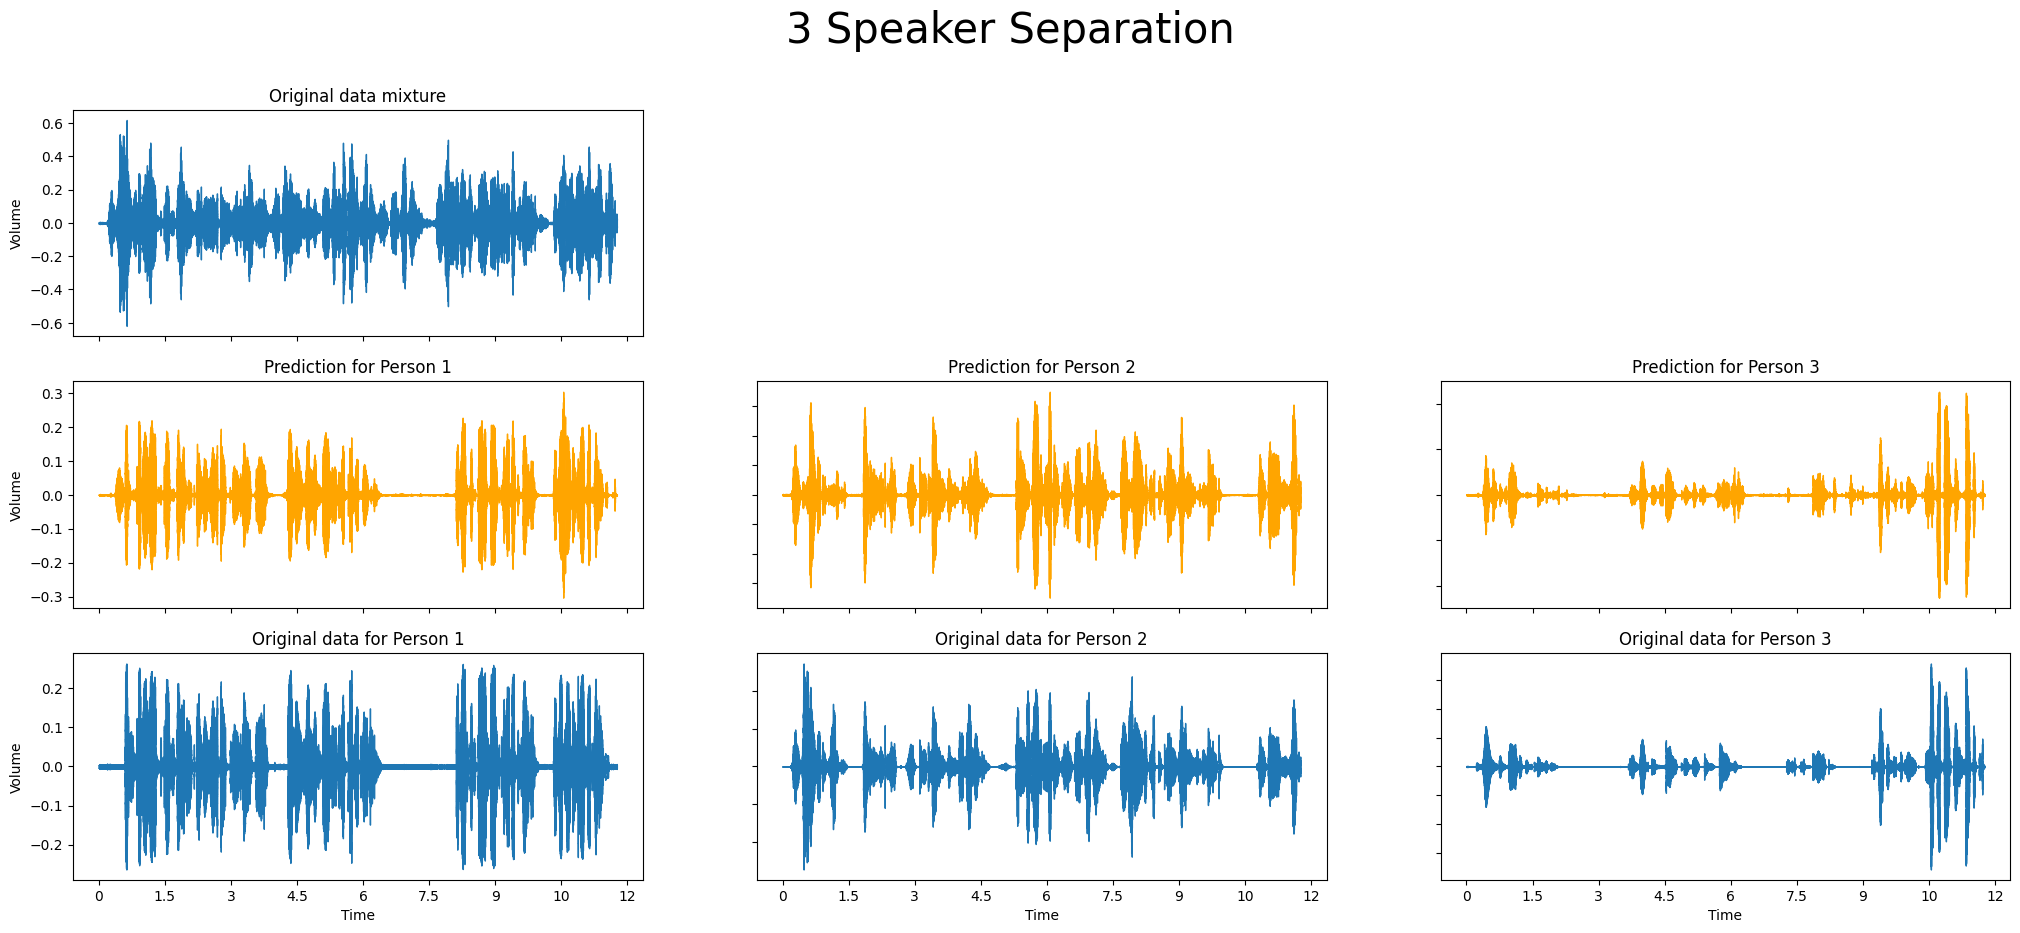

In [ ]:
def three_speakers_waveplot():
    # Wave Plot
    subplots  = [(2,1,1),(2,2,)]
    fig, ax = plt.subplots(3, 3,figsize=(25, 10))
    fig.suptitle('3 Speaker Separation', fontsize=30)

    # Original
    data, rate = librosa.load('/content/MiniLibriMix/test_subject/test.wav')

    librosa.display.waveshow(data, sr=rate, ax=ax[0,0])
    librosa.display.waveshow(data, sr=rate, ax=ax[0,1])
    ax[0,0].set_title("Original data mixture")

    ax[0,1].set_visible(False)
    ax[0,2].set_visible(False)

    # Predicted
    pdata1, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est1.wav')
    pdata2, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est2.wav')
    pdata3, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est3.wav')
    ax[1,0].set_title("Prediction for Person 1")
    ax[1,1].set_title("Prediction for Person 2")
    ax[1,2].set_title("Prediction for Person 3")

    librosa.display.waveshow(pdata1, sr=rate, ax=ax[1,0], color='Orange')
    librosa.display.waveshow(pdata2, sr=rate, ax=ax[1,1], color='Orange')
    librosa.display.waveshow(pdata3, sr=rate, ax=ax[1,2], color='Orange')

    # Original Separated
    odata1, rate = librosa.load('/content/MiniLibriMix/3spk test/s1/' + test_audio3)
    odata2, rate = librosa.load('/content/MiniLibriMix/3spk test/s2/' + test_audio3)
    odata3, rate = librosa.load('/content/MiniLibriMix/3spk test/s3/' + test_audio3)
    ax[2,0].set_title("Original data for Person 1")
    ax[2,1].set_title("Original data for Person 2")
    ax[2,2].set_title("Original data for Person 3")

    librosa.display.waveshow(odata1, sr=rate, ax=ax[2,0])
    librosa.display.waveshow(odata2, sr=rate, ax=ax[2,1])
    librosa.display.waveshow(odata3, sr=rate, ax=ax[2,2])

    for a in ax.flat:
        a.set(xlabel='Time', ylabel='Volume')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()

three_speakers_waveplot()

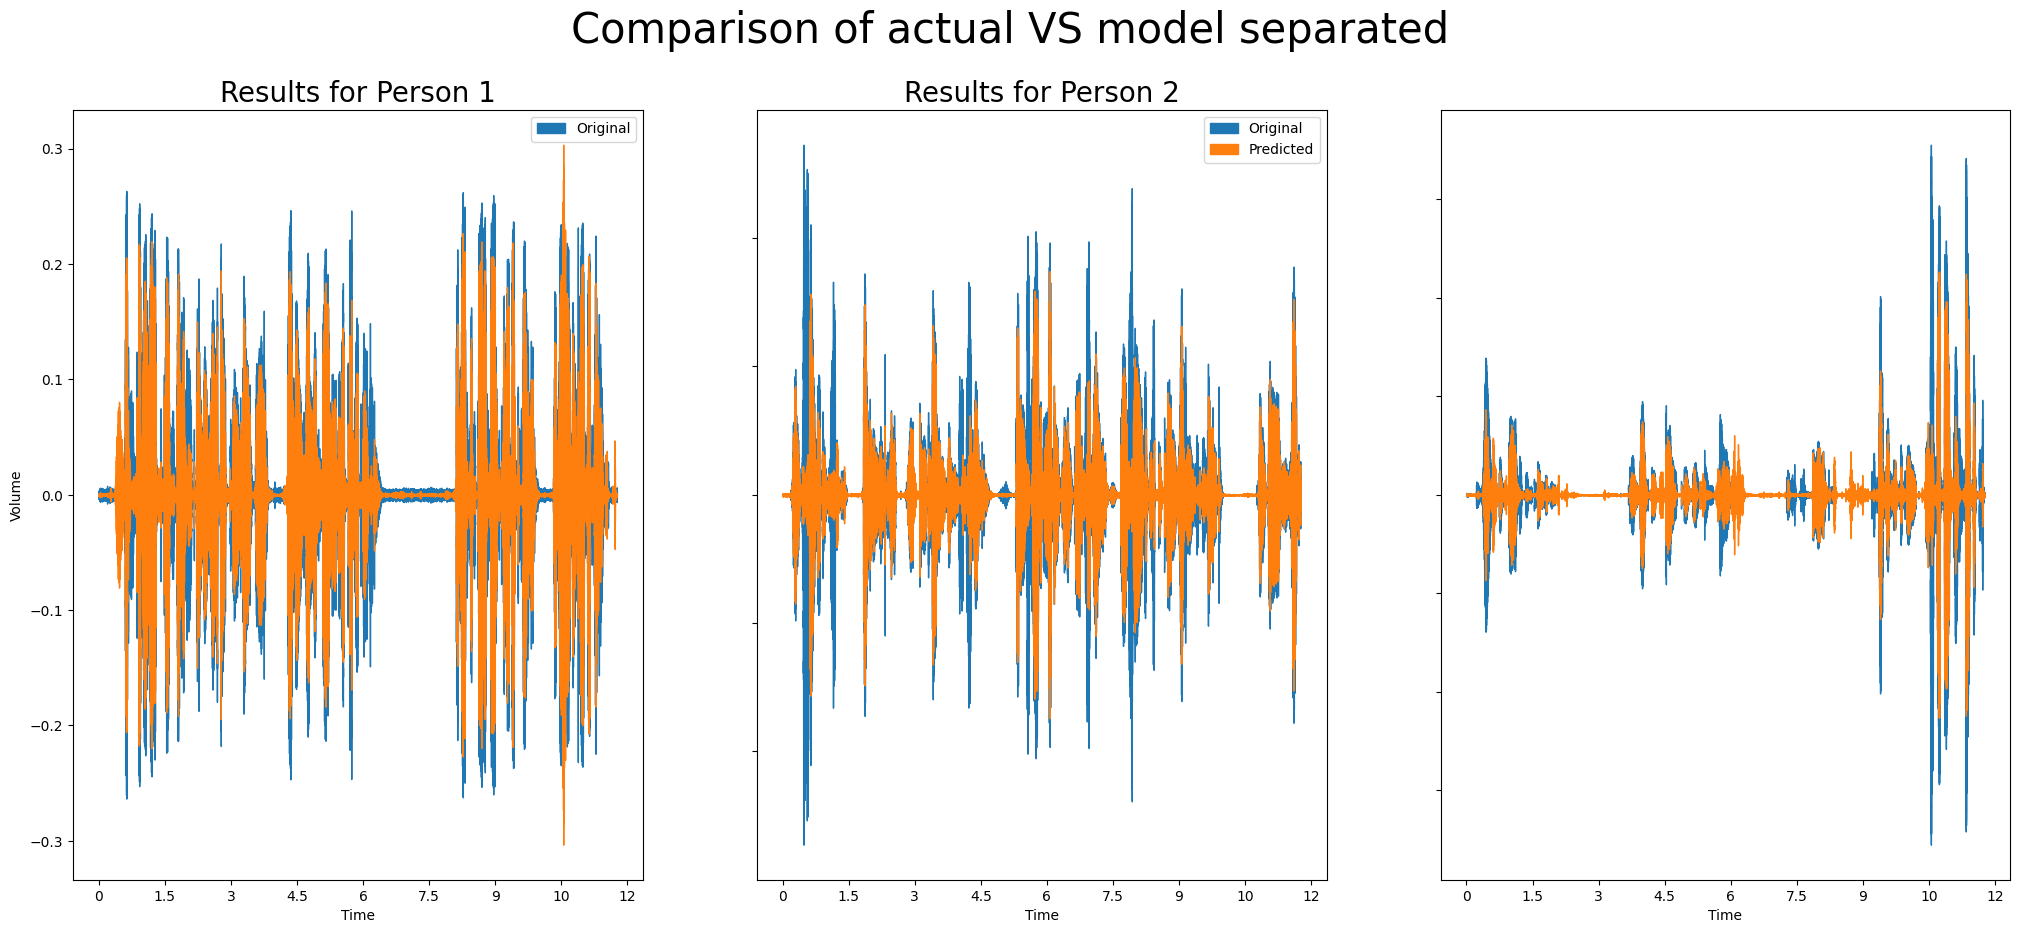

In [ ]:
def three_speakers_comparision():
    # Wave Plot
    fig, ax = plt.subplots(1, 3,figsize=(25, 10))
    fig.suptitle('Comparison of actual VS model separated', fontsize=30)

    # Predicted
    pdata1, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est1.wav')
    pdata2, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est2.wav')
    pdata3, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est3.wav')
    
    # Original Separated
    odata1, rate = librosa.load('/content/MiniLibriMix/3spk test/s1/'  + test_audio3)
    odata2, rate = librosa.load('/content/MiniLibriMix/3spk test/s2/' + test_audio3)
    odata3, rate = librosa.load('/content/MiniLibriMix/3spk test/s3/' + test_audio3)

    librosa.display.waveshow(odata1, sr=rate, ax=ax[0], label='Original')
    librosa.display.waveshow(odata2, sr=rate, ax=ax[1], label='Original')
    librosa.display.waveshow(odata3, sr=rate, ax=ax[2], label='Original')
    ax[0].set_title("Results for Person 1", fontsize = 20)
    ax[0].legend()

    # blue = actual
    # orange = predicted
    # 1 = person 1
    # 2 = person 2

    # Overlapped
    librosa.display.waveshow(pdata1, sr=rate, ax=ax[0], label='Predicted')
    librosa.display.waveshow(pdata2, sr=rate, ax=ax[1], label='Predicted')
    librosa.display.waveshow(pdata3, sr=rate, ax=ax[2], label='Predicted')
    ax[1].set_title("Results for Person 2", fontsize = 20)
    ax[1].legend()


    for a in ax.flat:
        a.set(xlabel='Time', ylabel='Volume')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()
        
three_speakers_comparision()

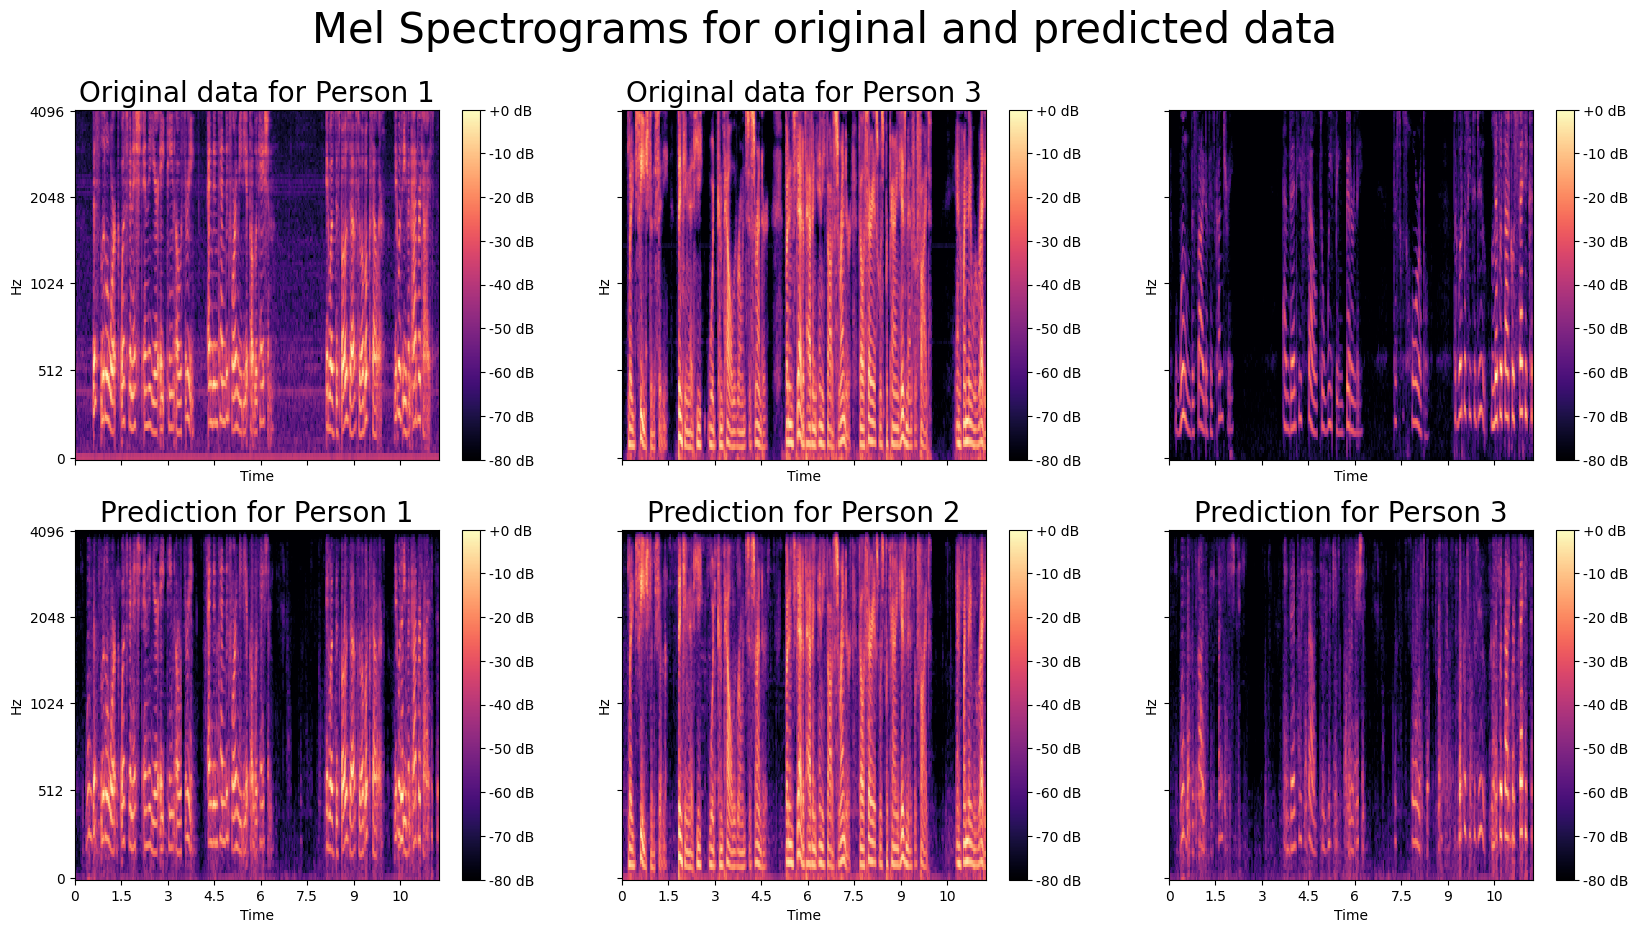

In [ ]:
def three_speakers_spectrogram():
    fig, ax = plt.subplots(2, 3,figsize=(20, 10))
    fig.suptitle('Mel Spectrograms for original and predicted data', fontsize=30)

    # Predicted
    pdata1, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est1.wav')
    pdata2, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est2.wav')
    pdata3, rate = librosa.load('/content/MiniLibriMix/test_subject/test_est3.wav')
    
    # Original Separated
    odata1, rate = librosa.load('/content/MiniLibriMix/3spk test/s1/'  + test_audio3)
    odata2, rate = librosa.load('/content/MiniLibriMix/3spk test/s2/' + test_audio3)
    odata3, rate = librosa.load('/content/MiniLibriMix/3spk test/s3/' + test_audio3)

    for a in ax.flat:
        a.set(xlabel='Time', ylabel='Hz')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()
        
    # Original data
    S = librosa.feature.melspectrogram(y=odata1, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[0,0])
    fig.colorbar(img, ax=ax[0,0], format='%+2.0f dB')
    ax[0,0].set_title("Original data for Person 1", fontsize = 20)

    S = librosa.feature.melspectrogram(y=odata2, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[0,1])
    fig.colorbar(img, ax=ax[0,1], format='%+2.0f dB')
    ax[0,1].set_title("Original data for Person 2", fontsize = 20)

    S = librosa.feature.melspectrogram(y=odata3, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[0,2])
    fig.colorbar(img, ax=ax[0,2], format='%+2.0f dB')
    ax[0,1].set_title("Original data for Person 3", fontsize = 20)

    # Predicted Data
    S = librosa.feature.melspectrogram(y=pdata1, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[1,0])
    fig.colorbar(img, ax=ax[1,0], format='%+2.0f dB')
    ax[1,0].set_title("Prediction for Person 1", fontsize = 20)

    S = librosa.feature.melspectrogram(y=pdata2, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[1,1])
    fig.colorbar(img, ax=ax[1,1], format='%+2.0f dB')
    ax[1,1].set_title("Prediction for Person 2", fontsize = 20)

    S = librosa.feature.melspectrogram(y=pdata3, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[1,2])
    fig.colorbar(img, ax=ax[1,2], format='%+2.0f dB')
    ax[1,2].set_title("Prediction for Person 3", fontsize = 20)
three_speakers_spectrogram()

In [ ]:
demo = gr.Blocks(theme=gr.themes.Soft())
with demo:
    
    gr.Markdown('''
    <center>
        <h1>Speech Separation</h1>
        <div style="display:flex;align-items:center;justify-content:center;">
            <iframe src="https://streamable.com/79z5ub?autoplay=1&nocontrols=1" frameborder="0" allow="autoplay">
            </iframe>
        </div>
        <p>
            It is a shareable demonstration window which can be used to view result on any device by setting 'share' a launch parameter 'True'.
            It displays original audio for mixture of speaker, seperated audio by our model and original individual speaker audio.
        </p>
    </center>
    ''')
    
    with gr.Row():
        output_text1 = gr.Text("Original Speech signal ", label='Speaker 1', interactive=False)
        gr.Audio('/content/MiniLibriMix/test_subject/test.wav', label='Mix Audio', interactive=False)

    with gr.Row():
        pass
    with gr.Row():
        pass
    gr.Markdown('''
        <h2> Separated Audio</h2>
    
    ''')
    with gr.Row():
        output_text2 = gr.Text("Separated Speech signal Speaker 1 ", label='Speaker 1', interactive=False)
        gr.Audio('/content/MiniLibriMix/test_subject/test_est1.wav', label='Speaker 1', interactive=False)
    
    with gr.Row():
        output_text2 = gr.Text("Separated Speech signal Speaker 2 ", label='Speaker 2', interactive=False)
        gr.Audio('/content/MiniLibriMix/test_subject/test_est2.wav', label='Speaker 2', interactive=False)
    
    with gr.Row():
        output_text2 = gr.Text("Separated Speech signal Speaker 3 ", label='Speaker 3', interactive=False)
        gr.Audio('/content/MiniLibriMix/test_subject/test_est3.wav', label='Speaker 3', interactive=False)


    with gr.Row():
        pass    
    with gr.Row():
        pass
    gr.Markdown('''         
        <h2> Original Source Audio</h2>
    
    ''')
    with gr.Row():
        output_text2 = gr.Text("Separated Speech signal Speaker 1 ", label='Speaker 1', interactive=False)
        gr.Audio('/content/MiniLibriMix/3spk test/s1/' + test_audio3, label='Speaker 1', interactive=False)
    
    with gr.Row():
        output_text2 = gr.Text("Separated Speech signal Speaker 2 ", label='Speaker 2', interactive=False)
        gr.Audio('/content/MiniLibriMix/3spk test/s2/' + test_audio3, label='Speaker 2', interactive=False)

    with gr.Row():
        output_text2 = gr.Text("Separated Speech signal Speaker 3 ", label='Speaker 3', interactive=False)
        gr.Audio('/content/MiniLibriMix/3spk test/s3/' + test_audio3, label='Speaker 3', interactive=False)
    
    gr.Markdown('''
    <center>
        <div style="display:flex;align-items:center;justify-content:center;">
            <a href="https://www.linkedin.com/in/dhruv73/" target="blank">
                <img src="https://raw.githubusercontent.com/devicons/devicon/1119b9f84c0290e0f0b38982099a2bd027a48bf1/icons/linkedin/linkedin-original.svg" alt="LinkedIN: /dhruv_73" width="100" height="100"/> 
            </a>
            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp
            <a href="https://github.com/DS-73" target="_blank"> 
                <img src="https://raw.githubusercontent.com/devicons/devicon/1119b9f84c0290e0f0b38982099a2bd027a48bf1/icons/github/github-original.svg" alt="Github: /DS-73" width="100" height="100"/> 
            </a>
        </div>
    </center>
    ''')

demo.close()

In [ ]:
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
demo.close()

Closing server running on port: 7860
